In [2]:
import numpy as np
import pandas as pd
import os

In [3]:
dataset = pd.read_csv("mnist.csv")

In [4]:
dataset.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train = pd.read_csv("mnist.csv")
test = pd.read_csv("mnist.csv")

In [6]:
X = train.drop("label",axis=1)/255.0
y = train['label']

In [7]:
X_test = test / 255.0
X_test

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.003922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.003922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.015686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41996,0.003922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41997,0.027451,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41998,0.023529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [9]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((31500, 784), (10500, 784), (31500,), (10500,))

In [10]:
import tensorflow as tf


In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(500, activation="relu"),
    tf.keras.layers.Dense(500, activation="relu"),
    tf.keras.layers.Dense(500, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

In [13]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=0.0008),
    metrics=["accuracy"]
)


In [14]:
history = model.fit(x_train,y_train,batch_size=64,epochs=50,validation_data=(x_test, y_test))

Epoch 1/50
493/493 [==============================] - 10s 18ms/step - loss: 0.2638 - accuracy: 0.9197 - val_loss: 0.1509 - val_accuracy: 0.9534
Epoch 2/50
493/493 [==============================] - 8s 16ms/step - loss: 0.1002 - accuracy: 0.9698 - val_loss: 0.1188 - val_accuracy: 0.9638
Epoch 3/50
493/493 [==============================] - 8s 16ms/step - loss: 0.0635 - accuracy: 0.9798 - val_loss: 0.1316 - val_accuracy: 0.9611
Epoch 4/50
493/493 [==============================] - 8s 16ms/step - loss: 0.0444 - accuracy: 0.9861 - val_loss: 0.1145 - val_accuracy: 0.9679
Epoch 5/50
493/493 [==============================] - 8s 16ms/step - loss: 0.0370 - accuracy: 0.9880 - val_loss: 0.1157 - val_accuracy: 0.9714
Epoch 6/50
493/493 [==============================] - 7s 15ms/step - loss: 0.0324 - accuracy: 0.9897 - val_loss: 0.1244 - val_accuracy: 0.9668
Epoch 7/50
493/493 [==============================] - 8s 15ms/step - loss: 0.0279 - accuracy: 0.9907 - val_loss: 0.1338 - val_accuracy: 0.966

In [15]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(500, activation="relu"),
    tf.keras.layers.Dense(500, activation="relu"),
    tf.keras.layers.Dense(500, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

In [17]:
model_2.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=0.0008),
    metrics=["accuracy"]
)

In [18]:
history = model_2.fit(X, y, batch_size=64,epochs=50)

Epoch 1/50
657/657 [==============================] - 9s 12ms/step - loss: 0.2290 - accuracy: 0.9296
Epoch 2/50
657/657 [==============================] - 7s 10ms/step - loss: 0.0887 - accuracy: 0.9718
Epoch 3/50
657/657 [==============================] - 8s 12ms/step - loss: 0.0598 - accuracy: 0.9810
Epoch 4/50
657/657 [==============================] - 9s 14ms/step - loss: 0.0457 - accuracy: 0.9858
Epoch 5/50
657/657 [==============================] - 9s 14ms/step - loss: 0.0374 - accuracy: 0.9878
Epoch 6/50
657/657 [==============================] - 9s 14ms/step - loss: 0.0315 - accuracy: 0.9898
Epoch 7/50
657/657 [==============================] - 9s 14ms/step - loss: 0.0233 - accuracy: 0.9922
Epoch 8/50
657/657 [==============================] - 9s 14ms/step - loss: 0.0239 - accuracy: 0.9923
Epoch 9/50
657/657 [==============================] - 9s 14ms/step - loss: 0.0209 - accuracy: 0.9934
Epoch 10/50
657/657 [==============================] - 9s 14ms/step - loss: 0.0199 - accura

<AxesSubplot:>

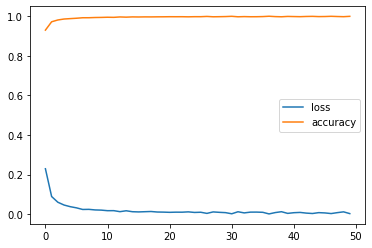

In [26]:
pd.DataFrame(history.history).plot()

In [29]:
y_probs = model_2.predict(x_test)

In [30]:
y_probs

array([[0.0000000e+00, 1.0183327e-28, 2.1627904e-25, ..., 1.0416615e-23,
        1.5925866e-21, 1.3200808e-26],
       [1.3974244e-34, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.9264630e-37, 0.0000000e+00],
       [5.6811987e-25, 4.6799626e-28, 2.9546393e-25, ..., 9.2495725e-18,
        3.7772963e-18, 1.0000000e+00],
       ...,
       [6.9394344e-25, 4.5007623e-13, 1.0256700e-20, ..., 1.3197267e-21,
        1.6319507e-16, 1.7898270e-15],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.9924780e-33, 0.0000000e+00, 0.0000000e+00, ..., 8.4050931e-37,
        5.7497881e-33, 9.0400759e-23]], dtype=float32)

In [31]:
y_preds=[]
for i in y_probs:
    y_preds.append(i.argmax())

In [46]:
submission = pd.read_csv("C:\\Users\\kushagra\\Desktop\\DATA SCIENCE\\Projects Skill\mnist.csv")

In [43]:
import os
os.getcwd()

'C:\\Users\\kushagra\\Desktop\\DATA SCIENCE\\Projects Skill'

In [48]:
submission.Label = y_preds

In [49]:
submission.to_csv("C:\\Users\\kushagra\\Desktop\\DATA SCIENCE\\Projects Skill\handwritten_project.csv", index=False)